1. Problem identification 

2. Data wrangling

3. Exploratory data analysis

4. Prep-processing and training data development

5. **Modeling (Machine learning steps)**

6. Documentation

<div class="span5 alert alert-warning">
<h3>Classification Models</h3>

- Are used to categorize categories like spam vs. not spam.
- Theres Binaryand multiclass classification. 



### <font color='deeppink'><b>k-Nearest Neighbors (KNN) </b></font> 

**Supervised Learning**

- Model that makes predictions based on similarity. Can predict both numerical values and categorical labels

Recommended Workflow:
1️⃣ Train-Test Split → Quick evaluation of how the model performs on unseen data.
2️⃣ Cross-Validation → More robust assessment by testing across multiple data splits.

**<span style="background-color: pink;">Train Test Split Model Code</span>**

```python
from sklearn.neighbors import KNeighborsClassifier 

y = df["dependent_variable"].values 

X = df[["predictor1", "predictor2"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

knn = KNeighborsClassifier(n_neighbors= 6) # pick a number for number of neighbors

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test) # for this part you will need new data 

print("Predictions: {}".format(y_pred))
```

**<span style="background-color: pink;">Cross-Validation Model Code</span>**

```python
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, KFold

import numpy as np

y = df["dependent_variable"].values 

X = df[["predictor1", "predictor2"]].values

# Create a KNN classifier with 6 neighbors

knn = KNeighborsClassifier(n_neighbors=6)

# Set up K-Fold cross-validation with 5 folds

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation

cv_scores = cross_val_score(knn, X, y, cv=kf)

# Print mean cross-validation accuracy

print("Cross-validation accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))

# Train the model on the full dataset

knn.fit(X, y)

# Make predictions on new data

y_pred = knn.predict(X_new)  # Replace X_new with actual new observations

# Print predictions

print("Predictions: {}".format(y_pred))
```

**<span style="background-color: pink;">Model Parameters</span>**

✅ n_neighbors → Number of neighbors to consider when making predictions (default is 5). 

✅ weights → Defines how neighbors contribute to classification ('uniform' gives equal weight, 'distance' gives more weight to closer neighbors). 

✅ algorithm → Determines how neighbors are searched ('auto', 'ball_tree', 'kd_tree', 'brute'). 

✅ leaf_size → Affects speed and memory usage when using tree-based algorithms (default is 30). 

✅ p → Power parameter for the Minkowski distance metric (p=1 is Manhattan distance, p=2 is Euclidean distance). 

✅ metric → Defines the distance function used ('minkowski', 'euclidean', 'manhattan', or a custom function). 

✅ metric_params → Additional arguments for the distance metric function. 

✅ n_jobs → Number of CPU cores used for parallel computation (None means one core, -1 uses all available cores).


**<span style="background-color: pink;">Scenerios To Use Model In</span>**

**<span style="color: mediumspringgreen;">Scenario 1: Customer Segmentation for Targeted Marketing</span>**

- Company: A retail chain with loyalty program data
-  Task: Predict which product category a customer is most likely to buy next

**Why KNN?**

- KNN can classify a new customer based on the purchasing behavior of similar customers.
- If someone has a similar purchase history to others who bought skincare products, the model can recommend that category.

**Features might include:**

- Purchase frequency

- Average spend per visit

- Product categories browsed

- Time of day purchases are made

Outcome: Personalized promotions and product recommendations based on behavioral similarity

**Metrics**

- Accuracy: Gives a quick snapshot of how often your model recommends the right product category.

- Confusion Matrix: Helps identify if, say, skincare is often confused with cosmetics. Valuable for refining category definitions or marketing segmentation.

- Precision: If you send skincare promos to people who aren’t likely to buy skincare, that’s wasted budget. Precision helps minimize that.

- Recall: If your model misses customers who would buy skincare, you lose potential revenue. High recall means you’re catching more of the right people.

- F1 Score:Especially useful when some categories are harder to predict or when false positives and negatives both have business costs.

- ROC-AUC: Useful for understanding which categories are easiest or hardest to predict. Can guide feature engineering or marketing strategy.

**<span style="color: mediumspringgreen;">Scenario 2: Medical Diagnosis Support</span>**

- Company: A healthcare analytics startup
- Task: Classify whether a patient’s symptoms and test results indicate a specific disease

**Why KNN?**
- Medical data often has complex, nonlinear relationships.
- KNN can classify a new patient by comparing their lab results, symptoms, and vitals to similar patients in the dataset.

**Features might include:**

- Blood pressure

- Cholesterol levels

- Age, weight, and BMI

- Reported symptoms

- Outcome: A decision-support tool for clinicians that flags potential diagnoses based on similar cases.


**<span style="background-color: pink;">Metrics</span>**

- Accuracy: Measures diagnostic correctness
- Precision: Of all patients flagged as having a disease, how many actually do?
- Recall: Of all patients who actually have the disease, how many did your model catch?
- F1- score: The harmonic mean of precision and recall.
- Confision Matrix: If anemia is often misclassified as hypothyroidism, you may need better features or more training data for those conditions.

**<span style="background-color: pink;">Model Evaluation</span>**


- accuracy score
```python

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
```

- confusion matrix
- classification report


### <font color='deeppink'><b>Decision Tree</b></font> 

**Supervised Learning**

Is a versatile machine learning algorithm that can be used for both **classification and regression tasks**.

Classification: In classification tasks, a decision tree predicts the class or category of a given input. It does this by splitting the data into subsets based on the values of the input features. Each split is chosen to maximize the separation between different classes. The final prediction is made by following the path from the root of the tree to a leaf node, which represents the predicted class.
- or example, if you're using a decision tree for a classification task, such as predicting whether an email is "spam" or "not spam," the classes would be "spam" and "not spam.

Regression: In regression tasks, a decision tree predicts a continuous value by splitting the data into regions. Each split is chosen to minimize the variance within each region, leading to more accurate predictions. When new input data is provided, the decision tree determines which region it belongs to and uses the av
- Imagine you have a dataset with two features: X (the number of hours studied) and y (the score on a test). You want to predict the test score based on the number of hours studied.
1. Splitting the Data: The decision tree algorithm starts by finding the best split. For example, it might split the data at X = 3:

            Left node: X <= 3 (Hours Studied: 1, 2, 3)

            Right node: X > 3 (Hours Studied: 4, 5)

2. The algorithm continues splitting data into branches until it reaches a stopping condition (**node purity, Gini impurity, and entropy all aim to measure the quality of a split in a decision tree, but they differ in how they calculate impurity.** )

3. Calculating Predictions: For each node, the algorithm calculates the average test score:

        Left node: Average score = (50 + 55 + 65) / 3 = 56.67

        Right node: Average score = (70 + 75) / 2 = 72.5
In both cases, the decision tree uses a series of if-then-else rules to make predictions, making it easy to interpret and understand.

**<span style="background-color: pink;">Model Code</span>**

```python
# Declare a variable called entr_model, gini model or node model and use tree.DecisionTreeClassifier.

from sklearn.tree import DecisionTreeClassifier

entr_model = DecisionTreeClassifier(criterion="entropy", random_state = 1234)

# Call fit() on entr_model

entr_model.fit(X_train,y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred

y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)

y_pred = pd.Series(y_pred)

#print

entr_model
```


**Vizualize the decision tree**

```python

import graphviz

dot_data = StringIO()

# We can do so with export_graphviz

tree.export_graphviz(entr_model, out_file=dot_data, filled=True, rounded=True, special_characters=True,

            feature_names=X_train.columns,class_names = ["NO", "YES"]) 

# Alternatively for class_names use entr_model.classes_

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())
```
**<span style="background-color: pink;">Scenerios To Use Model In</span>**

Same as KNN 

**<span style="background-color: pink;">Model Evaluations</span>**

**For Classification Models**
-  Accuracy Score
-  Confusion Matrix
- Precision, Recall & F1-Score
- ROC Curve & AUC Score

**For Regression Models** 
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R² Score (Coefficient of Determination)









# Bagging vs Boosting 

**Bagging** : Trains multiple models independently on different random subsets of the data. Each model makes a prediction, and the final result is obtained by aggregating (majority vote for classification, averaging for regression). Reduces variance and prevents overfitting. Example: Random Forest (uses multiple decision trees trained independently).

1️⃣ Bootstrap Sampling → Train multiple models on different subsets of the data. 

2️⃣ Independent Model Training → Each model learns separately. 

3️⃣ Aggregation → Predictions are combined using voting or averaging.


**Boosting**: Sequential learning—each model learns from the mistakes of the previous one. Assigns higher weights to misclassified points to improve accuracy. Reduces bias but can be prone to overfitting. Example: AdaBoost, Gradient Boosting, XGBoost.

1️⃣ Train a Weak Model → Start with a simple learner (often a decision tree). 

2️⃣ Focus on Errors → Misclassified samples get increased importance in the next model. 

3️⃣ Sequential Learning → New models correct previous mistakes, refining predictions.

### <font color='deeppink'><b>Random Forest Classifier</b></font> 

**Suppervisd Learning & Bagging**

The random forest is a classification algorithm that’s made up of decision trees. You’ll use random forest when working on **classification and regression tasks**.

**Bagging is a machine learning ensemble method** that improves accuracy and reduces overfitting by using bootstrapping + aggregation. Random forest is a bagging model where multiple models (often decision trees) are trained on different bootstrapped samples of the data. Each model makes its own prediction, and the final output is aggregated (majority vote for classification, averaging for regression).


**Two key steps** 

1️⃣ Bootstrap Sampling: First, Random Forest randomly selects subsets of full rows (samples) from the dataset. These subsets are created using replacement, meaning some rows may appear multiple times in different trees. Each tree trains on a different sample of rows to increase diversity.

2️⃣ Random Predictor Selection at Each Split

When building each tree, the algorithm randomly selects a subset of predictors (columns) instead of considering all predictors at each split.
The best predictor from this subset is chosen to split the data.
This ensures different trees rely on different predictors, reducing correlation between them.

3️⃣ Classification → Majority vote (whichever class gets the most votes wins). Regression → Average prediction across all trees.

This reduces variance and creates a more stable, accurate model compared to a single decision tree.

**<span style="background-color: pink;">Model Code</span>**

```python

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

```
**<span style="background-color: pink;">Scenerios To Use Model In</span>**

Same as KNN

**<span style="background-color: pink;">Model Evaluations</span>**

- accuracy_score(y_test, y_pred)
- precision_score
- recall_score
- f1_score
- confusion_matrix
- roc_auc_score


### <font color='deeppink'><b>AdaBoost (Adaptive Boosting)</b></font> 

**Supervised Learning & Boosting**

Is an ensemble learning technique that boosts the performance of weak models by focusing on misclassified instances. Unlike Bagging (used in Random Forest), which trains models independently, Boosting trains models sequentially, improving accuracy at each step.

1️⃣ Train a Weak Model → Start with a simple model (often a Decision Stump, a shallow decision tree). 

2️⃣ Adjust Weights → Increase the weight of misclassified instances so the next model focuses more on them. 

3️⃣ Train Another Model → A new model is trained, correcting previous mistakes. 

4️⃣ Repeat → This process continues, creating multiple models that progressively improve.

5️⃣ Classification → Final predictions are based on weighted voting (majority wins). ✅ Regression → Final predictions are based on weighted averaging of the weak learners' outputs.


**<span style="background-color: pink;">Model Code </span>**

```python

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = AdaBoostClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
```

**<span style="background-color: pink;">Model Parameters</span>**

✅ estimator → The base model used for boosting (default is DecisionTreeClassifier(max_depth=1)). 

✅ n_estimators → Number of weak learners (default is 50). More estimators can improve accuracy but may lead to overfitting. A weak learner is a simple model that performs slightly better than random guessing but improves through boosting techniques to form a stronger, more accurate prediction system.

✅ learning_rate → Controls how much each weak learner contributes (default is 1.0). Lower values make learning slower but more stable. 

✅ algorithm → Defines the boosting method ("SAMME" for discrete boosting, "SAMME.R" for real boosting). 

✅ random_state → Ensures reproducibility by setting a fixed seed for randomness.


**<span style="background-color: pink;">Scenerio To Use Model In </span>**

Same ad KNN

**<span style="background-color: pink;">Model Evaluation </span>**

- accuracy_score(y_test, y_pred)
- Confusion Matrix
- Precision, Recall & F1-Score
- ROC Curve & AUC Score



### <font color='deeppink'><b>Gradient Boosting</b></font> 

**Supervised Learning & Boosting**

Is a **boosting technique** used in both classification and regression tasks (DecisionTreeRegressor for regression, DecisionTreeClassifier for classification). Unlike Random Forest (which builds independent trees), Gradient Boosting builds trees sequentially—each tree learns from the mistakes of the previous ones.
Instead of bagging (like in Random Forest), Gradient Boosting gradually corrects errors by optimizing a loss function.

Three Key Steps in Gradient Boosting

1️⃣ Train Initial Weak Model
The process starts with a simple weak learner—often a shallow decision tree (known as a stump).

This weak model tries to predict the target variable but is initially inaccurate.

2️⃣ Compute Residuals & Train on Errors
The model calculates residuals, which are the differences between actual and predicted values.

A new tree is trained to predict these residuals (i.e., where the first model made errors).

This process repeats, with each new tree correcting mistakes of the previous ones.

3️⃣ Weighted Aggregation of Models
Each new tree adds a weighted contribution to the final prediction.

The final output is the sum of all weak models, progressively improving accuracy.

Final Predictions:

Classification → Uses probability scores and weighted voting to classify instances.

Regression → Aggregates predictions using weighted averaging.

**<span style="background-color: pink;">Model Code</span>**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GradientBoostingClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
```

**<span style="background-color: pink;">Scenerios To Use Model In</span>**
Same as KNN


**<span style="background-color: pink;">Model Evaluations</span>**

- accuracy_score(y_test, y_pred)
- Log Loss
- Confusion Matrix
- Precision, Recall & F1-Score
- ROC Curve & AUC Score

### <font color='deeppink'><b>XGBoost (Extreme Gradient Boosting)</b></font> 

**Supervised Learning & Boosting** 

Is an optimized version of Gradient Boosting that enhances both speed and performance in predictive modeling. It is designed to handle large datasets efficiently. 

Key steps 

1️⃣ Train Initial Model – Starts with a weak learner, typically a decision tree. 

2️⃣ Compute Residuals & Fit New Trees – Each new tree learns from previous errors by predicting the residuals (differences between actual and predicted values). 

3️⃣ Final output: ✅ Classification (XGBClassifier) → Predicts discrete class labels. ✅ Regression (XGBRegressor) → Predicts continuous


**<span style="background-color: pink;">Model Code</span>**

```python
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

# Splitting dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the XGBoost classifier

clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')

# Training the model

clf.fit(X_train, y_train)

# Making predictions

y_pred = clf.predict(X_test)
```
**<span style="background-color: pink;">Model Parameters</span>**

✅ booster → Defines the model type (default is "gbtree"). Options: "gblinear" for linear models, "dart" for dropout trees.

✅ n_estimators → Number of trees in the ensemble (default is 100). Increasing can improve performance but may lead to overfitting.

✅ verbosity – Controls logging level: 0 = Silent, 1 = Warning (default), 2 = Info, 3 = Debug

Tree-Specific Parameters

✅ learning_rate → Controls how much each tree contributes (default is 0.1). Lower values improve stability but require more trees.

✅ max_depth → Maximum depth of trees (default is 6). Larger values capture more complex patterns but may overfit.

✅ gamma → Minimum loss reduction required for a split (default is 0). Higher values create more conservative trees.

✅ min_child_weight → Minimum sum of instance weights for a child node (default is 1). Helps prevent overfitting by requiring more samples per leaf.

✅ subsample → Fraction of training data used per tree (default is 1.0). Lower values reduce overfitting but may introduce bias.

✅ colsample_bytree → Fraction of features used for each tree (default is 1.0). Helps with feature selection and generalization.

Regularization Parameters

✅ reg_alpha → L1 regularization penalty (default is 0). Helps create sparse models and feature selection.

✅ reg_lambda → L2 regularization penalty (default is 1). Helps reduce overfitting without eliminating features.

Evaluation & Optimization

✅ eval_metric → Defines the evaluation metric (default is "logloss"). Options include "error" (classification error) and "auc" (area under ROC curve).

✅ early_stopping_rounds → Stops training if validation performance doesn’t improve after a set number of rounds.

Miscellaneous

✅ random_state → Ensures reproducibility by setting a fixed seed for randomness.

✅ scale_pos_weight → Adjusts balance for imbalanced datasets (default is 1). Useful for handling skewed data in classification.

✅ objective → Defines the learning task (default is "binary:logistic" for binary classification). "multi:softmax" for multi-class classification, "multi:softprob" for probability outputs.

✅ feature_importances_ → Measures feature importance based on impurity reduction. Helps identify key predictive variables.

**<span style="background-color: pink;">Scenerios To Use Model In</span>**

Same as KNN 

**<span style="background-color: pink;">Model evaluations</span>**

- logloss 
- error 
- f1-score 
- merror 
- mlogloss
- Confusion Matrix
- Precision, Recall & F1-Score
- ROC Curve & AUC Score

### <font color='deeppink'><b>Support Vector Machines (SVM)</b></font> 

**Supervised Learning**

- It works by finding the optimal boundary (called a hyperplane) that best separates different classes in the dataset. The goal is to maximize the margin between the hyperplane and the closest data points from each class these closest points are called support vectors. Used in both classification and regression (In regression it is called SVR look uner predictive models). 


**But first understand**

**Support Vector Classifier** : Refers specifically to the linear case. It finds the best linear decision boundary that maximizes the margin between different classes. Essentially, SVC is a version of SVM applied to linear classification tasks.

- If the data is linearly separable, SVM simply finds the straight-line boundary (or plane in higher dimensions).
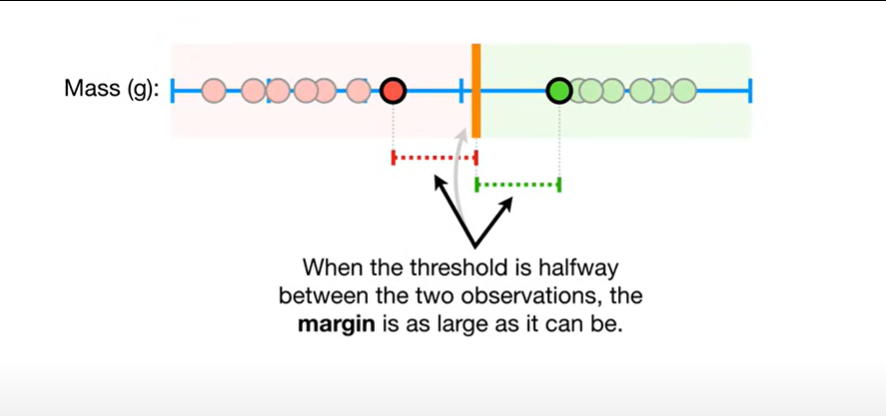


**Support Vector Machine**
The black dot is x and the new dot above is x squared. The new value will land on the plane that it will be classified as. This is a Support Vector Machine because it is transforming the values to higher dimensions. 
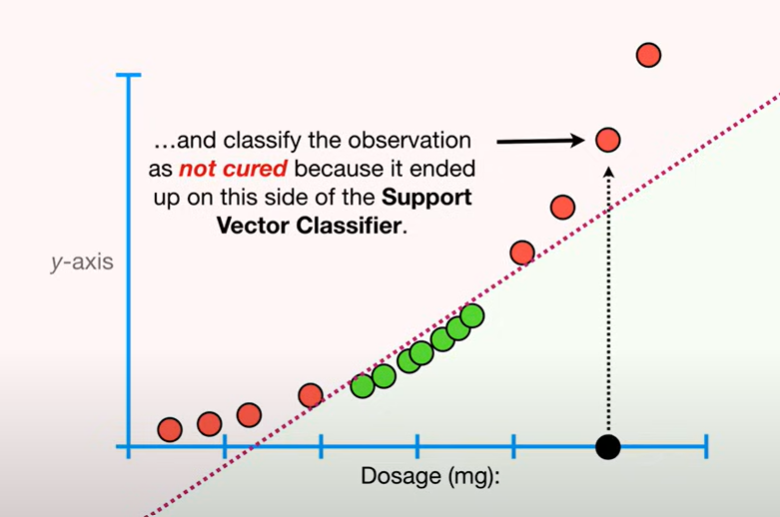

- If the data is not linearly separable, it uses a trick called kernels to transform the data into a higher-dimensional space where separation becomes easier.


**Kernels**
- Kernels are what make Support Vector Machines (SVMs) so powerful when dealing with complex datasets! They help transform nonlinearly separable data into a higher-dimensional space where a linear separation becomes possible.

**Types of Kernels & Their Impact**

higher dimensionality to classify, can go up to infinite amount of dimentions but to pick the best one we must do cross-validation.
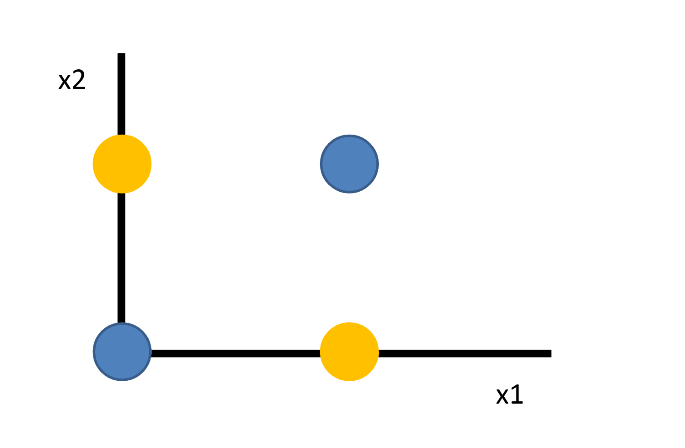
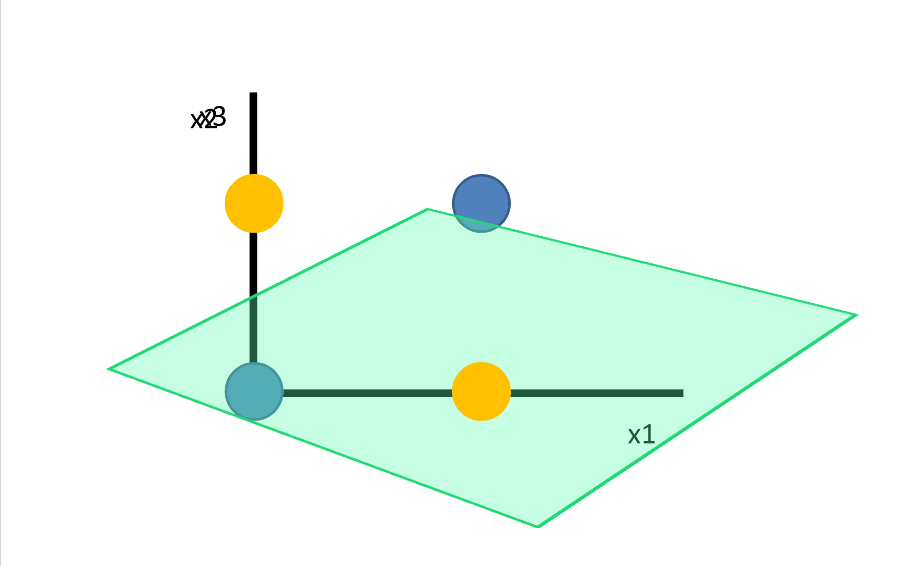

1️⃣ Linear Kernel

When to Use: If your data is naturally separable by a straight line or hyperplane.

Example: Spam detection where words like “buy now” clearly separate spam from non-spam.

Pros: Fast and interpretable.

Cons: Doesn’t work well for complex patterns.

2️⃣ Polynomial Kernel

When to Use: If your data has curved relationships that need feature expansion.

Example: Handwriting recognition where features like loops in letters help differentiate classes.

Pros: Allows flexible decision boundaries.

Cons: Can be computationally expensive for high-degree polynomials.

3️⃣ Radial Basis Function (RBF) Kernel

When to Use: When the data has no obvious linear boundary and requires transformation into a higher dimensional space.

Example: Image classification where pixel values alone might not separate classes well.

Pros: Extremely powerful for nonlinear problems.

Cons: Harder to interpret and requires tuning hyperparameters.

4️⃣ Sigmoid Kernel

When to Use: When data behaves similarly to neural networks (but typically less used).

Example: Certain biological pattern recognition tasks.

Pros: Has similarities with deep learning methods.

Cons: Often outperformed by RBF and polynomial kernels.

**<span style="background-color: pink;">Model Code</span>**

```python
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# Assuming X and y are already defined

# Example: X = your feature not including y, y = predictor variable 

# Split Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train the SVM Model

model = SVC(kernel='rbf', C=1.0, gamma='scale')

model.fit(X_train, y_train)

# Make Predictions

y_pred = model.predict(X_test)

```
**<span style="background-color: pink;">Model Evaluations</span>**

- Accuracy Score
- Confusion Matrix
- Precision
- Recall &
- F1-Score
- ROC Curve & AUC Score
- Cross-Validation

```python
# Evaluate Model Accuracy

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# (Optional) Visualize Decision Boundaries

def plot_decision_boundary(model, X, y):

    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.show()

plot_decision_boundary(model, X_train, y_train)
```




### <font color='deeppink'><b>Logistic Regression - for binary classification</b></font> 

- Model used for predicting categories, like yes/no or true/false (binary). Instead of giving a straight line prediction like linear regression, it estimates the probability that something belongs to a certain class.


**<span style="background-color: pink;">Model Code</span>**

```python

from sklearn.linear_model import LogisticRegression
# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]

```
**Logistic Regression with cross validation approach** 

**<span style="background-color: pink;">Model Code</span>**

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset
df = pd.read_csv("your_data.csv")  # Replace with your dataset

# Split dataset into features (X) and target variable (y)
X = df.drop("target_column", axis=1)  # Replace with your actual target column
y = df["target_column"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
logreg = LogisticRegression()

# Apply cross-validation (5-fold)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())


# Train the logistic regression model on full training data
logreg.fit(X_train, y_train)

# Predict class labels
y_pred = logreg.predict(X_test)

# Predict probabilities (for threshold tuning or ROC curves)
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

# Print predictions
print("Predicted labels:", y_pred)
print("Predicted probabilities:", y_pred_probs)

```

**<span style="background-color: pink;">Model Evaluations</span>**

- ROC
- ROC AUC
- Confusion Matrix
- Classification Report


<div class="span5 alert alert-warning">
<h3>Image Classification Models</h3>

### <font color='deeppink'><b>CNN - Convolutional Neural Networks (CNNs)</b></font> 

The term "convolutional" in Convolutional Neural Networks (CNNs) refers to the mathematical operation called convolution. Convolution is a process that combines two sets of information. In the context of CNNs, it involves applying a filter (or kernel) to the input data (such as an image) to produce a feature map. Feature map is both the Con2D and MaxPooling2D. 
- input data needs to be 4D array 
- data needs to be images 
- reach a 90% accuracy for the model to be considered good. 


**<span style="background-color: pink;">Model Code</span>**


```python
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential # The API required to build CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input # API that adds layersto CNN 
from tensorflow.keras.regularizers import l2

model_cnn = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(1, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(1, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Assuming 10 classes for classification
])

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

model_cnn.fit(train_images_cop, train_1hot_label, epochs=40, batch_size=250, 
              validation_data=(test_images_cop, test_1hot_label))

# Train the model 
model_cnn.fit(train_images_cop, train_1hot_label, epochs=10, batch_size=300, 
              validation_data=(test_images_cop, test_1hot_label))


```

**<span style="background-color: pink;">Model Parameters</span>**

 
- filters: Number of output filters in the convolution.

- kernel_size: Size of the convolution window (e.g., (3, 3)).

- strides: Stride of the convolution (default is (1, 1)).

- padding: Padding method ('valid' or 'same').

- activation: Activation function to use (e.g., 'relu').

- MaxPooling2D: pool_size: Size of the pooling window (e.g., (2, 2)).

- strides: Stride of the pooling operation (default is the same as pool_size).

- padding: Padding method ('valid' or 'same').

- Flatten:No parameters: This layer simply flattens the input.
- Dense:units: Number of neurons in the layer.

- activation: Activation function to use (e.g., 'relu', 'softmax').

- Dropout:rate: Fraction of the input units to drop (e.g., 0.5 for 50%).

- BatchNormalization: normalizes the activations of each layer to have a mean of zero and a standard deviation of one. Its like standardization but for images. 

- momentum: Momentum for the moving average (default is 0.99).

- epsilon: Small float added to variance to avoid dividing by zero (default is 0.001).

- Activation: activation: Activation function to use (e.g., 'relu', 'sigmoid', 'softmax').


**<span style="background-color: pink;">Model Evaluations</span>**

```python
# Evaluate the model on the training data 
train_loss, train_accuracy = model_cnn.evaluate(train_images_cop, train_1hot_label) 
print(f'Training accuracy: {train_accuracy}')
# Evaluate the model on the test data 
test_loss, test_accuracy = model_cnn.evaluate(test_images_cop, test_1hot_label) 
print(f'Test accuracy: {test_accuracy}')

```

- Accuracy
- Precision
- Recall
- F1- Score
- Confusion Matrix
- ROC-AUC

**These here are Layers in the CNN were each play a role in classifying the images.**
 
   **Key Layers and Their Functions: there are more but these are the most commonly used**
- Conv2D: Applies convolutional filters to the input data, detecting features like edges, textures, and patterns.

- MaxPooling2D: Reduces the spatial dimensions of the data, helping to down sample and reduce the computational load. Pretty much makes the image smaller. 

- Flatten: Converts the multi dimensional output of the convolutional layers into a 1D array, preparing it for the fully connected layers.

- Dense: Fully connected layer that performs classification or regression based on the extracted features.

- Dropout: Regularization layer that randomly sets a fraction of input units to 0 during training, helping to prevent overfitting.

- BatchNormalization: Normalizes the activations of the previous layer at each batch, which can help speed up training and improve performance.

- Activation: Applies an activation function to the output, such as ReLU, sigmoid, or softmax, introducing non linearity into the model.

- ImageDataGenerator :Data Augmentation: Data augmentation applies random transformations to each image in the training data, so each image will be slightly different every time it is processed. This means that not all images will have the same rotation, width shift, height shift, horizontal flip, or zoom. Instead, these transformations are applied randomly within the specified range, creating a diverse set of augmented images.For example, if you set rotation_range=20, each image might be rotated by a random angle between -20 and +20 degrees. Similarly, width_shift_range=0.2 means each image might be shifted horizontally by up to 20% of its width, and so on. This randomness helps the model learn to generalize better by seeing a wider variety of images during training. 

<div class="span5 alert alert-warning">
<h3>Classification Models Evaluation Metrics</h3>

- Accuracy Used for classification problems. It tells you what percentage of predictions were correct. Simple and intuitive, but not great if your classes are imbalanced.

- Precision Out of all the times your model said “yes,” how many were actually correct? Useful when false positives are costly.

- Recall Out of all the actual “yes” cases, how many did your model catch? Important when missing a true case is risky.

- F1 Score This balances precision and recall. It’s helpful when you care about both false positives and false negatives.

- ROC-AUC This measures how well your model can distinguish between classes. A score close to 1 means your model is great at separating “yes” from “no.”

- Confusion Matrix is a table that shows how well your classification model is doing by comparing what it predicted vs. what actually happened.